<div style="text-align: right">AI workshop at Northeastern with EM Lyon Business School</div>
<div style="text-align: right">Zixiao Wang , 24 November 2019,</div>

# Notebook Draft

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
%matplotlib inline

## Load Stock Data

In [45]:
dataset = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&outputsize=full&symbol=AAPL&interval=1min&apikey=G6JDX3PTNITW8EW1&datatype=csv")

In [46]:
dataset.head(10)

,timestamp,open,high,low,close,volume
0,2019-11-22 16:00:00,261.850,262.2400,261.72,261.8700,538382
1,2019-11-22 15:59:00,261.750,261.8500,261.69,261.8500,135916
2,2019-11-22 15:58:00,261.630,261.7900,261.54,261.7600,113699
3,2019-11-22 15:57:00,261.550,261.7500,261.55,261.6300,84277
4,2019-11-22 15:56:00,261.350,261.6000,261.34,261.5650,99721
5,2019-11-22 15:55:00,261.110,261.3500,261.10,261.3500,79798
6,2019-11-22 15:54:00,261.012,261.1500,261.01,261.1200,57699
7,2019-11-22 15:53:00,260.890,261.0300,260.85,261.0199,71229
8,2019-11-22 15:52:00,261.030,261.0500,260.84,260.8800,89980
9,2019-11-22 15:51:00,261.100,261.1339,260.94,261.0300,193347


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 6 columns):
timestamp    1932 non-null object
open         1932 non-null float64
high         1932 non-null float64
low          1932 non-null float64
close        1932 non-null float64
volume       1932 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 90.7+ KB


In [48]:
time_close = dataset.iloc[:,[0,4]]
# dataset["timestamp","close"]
time_close.head(10)

,timestamp,close
0,2019-11-22 16:00:00,261.8700
1,2019-11-22 15:59:00,261.8500
2,2019-11-22 15:58:00,261.7600
3,2019-11-22 15:57:00,261.6300
4,2019-11-22 15:56:00,261.5650
5,2019-11-22 15:55:00,261.3500
6,2019-11-22 15:54:00,261.1200
7,2019-11-22 15:53:00,261.0199
8,2019-11-22 15:52:00,260.8800
9,2019-11-22 15:51:00,261.0300


In [61]:
time_close.tail(10)

,timestamp,close
1922,2019-11-18 09:40:00,265.1500
1923,2019-11-18 09:39:00,265.2200
1924,2019-11-18 09:38:00,264.8600
1925,2019-11-18 09:37:00,264.9800
1926,2019-11-18 09:36:00,265.2600
1927,2019-11-18 09:35:00,265.0200
1928,2019-11-18 09:34:00,265.2500
1929,2019-11-18 09:33:00,265.3600
1930,2019-11-18 09:32:00,265.6000
1931,2019-11-18 09:31:00,265.5676


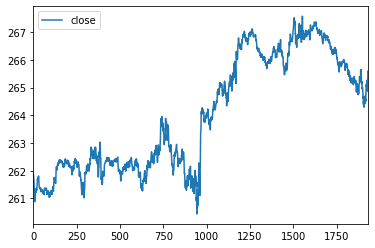

In [60]:
time_close.plot()
# plt.plot_date(time_close.iloc[:,[0]],time_close.iloc[:,[1]], '-')

## Basic Q-Learning Model

In [ ]:
%%time
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .8
y = .95
num_episodes = 4000
#create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    totalReward = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        # Pi function: Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        # Value function Bellman equation: Update Q-Table with new knowledge
        # Q(s,a) = r + γ(max(Q(s’,a’))
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        totalReward += r
        s = s1
        if d == True:
            break
    rList.append(totalReward)